In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy.stats import pointbiserialr

pd.set_option('display.max_columns', None)

In [ ]:
# function to calculate point biserial correlation for chosen columns
def calculate_pb_corr(df, binary_col, cont_cols):
    corr_df = df[cont_cols].apply(lambda x: pointbiserialr(df[binary_col], x)[0])
    return corr_df


# function to build heatmaps with point biserial correlation between ten the most popular genres and color columns
def create_corr_plots(df, top_ten_genres):
  """
    Creates a grid of subplots, where each subplot shows a heatmap of the point-biserial correlations 
    between the specified genre and each color column.
    
    Args:
    - df: a pandas DataFrame containing the data
    - top_ten_genres: a list of strings indicating the names of ten the most popular genres in df
    
    Returns:
    - None
    """
  num_cols = 2
  num_rows = 5
  fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 30))

  # columns to calculate point biserial correlation for
  color_cols = ['black', 'gray', 'silver', 'white', 'maroon', 'red',
              'orange', 'yellow', 'olive', 'green', 'lime', 'teal',
              'cyan', 'navy', 'blue', 'purple', 'pink']

  # loop over each genre and create a heatmap in the corresponding subplot
  for i, genre in enumerate(top_ten_genres):
      # create new column with 1 if genre is present, 0 otherwise
      df[genre] = df['genres'].apply(lambda x: 1 if genre in x else 0)
      # calculate point biserial correlation for chosen columns
      corr_df = calculate_pb_corr(df, genre, color_cols)
      # create heatmap of correlations in the corresponding subplot
      ax = axs[i//num_cols, i%num_cols]
      sns.heatmap(corr_df.to_frame(), annot=True, cmap='coolwarm', vmin=-0.5, vmax=0.5, ax=ax, annot_kws={"fontsize":19})
      ax.set_title(f'Point-biserial correlation with {genre.upper()} genre', fontsize=19)
      ax.tick_params(axis='y', labelsize=19)
      cbar_ax = ax.collections[0].colorbar.ax
      cbar_ax.tick_params(labelsize=19)
      

  plt.tight_layout()
  plt.show()

In [ ]:
union_df = pd.read_csv('/content/union_df.csv')
union_df

,id,title,all_artists,genres,cover,black,gray,silver,white,maroon,red,orange,yellow,olive,green,lime,teal,cyan,navy,blue,purple,pink,popularity,release_date,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_id
0,6H7RUDjmjiGV4I9hE24Kk5,drivers license,jxdn,"pop punk, social media pop",https://i.scdn.co/image/ab67616d00001e0214e2f6...,0.250,0.250,0.250,0.125,0.000,0.125,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,54,2021-01-19,0.598,0.787,10,-4.695,1,0.017500,0.000000,0.0887,0.2980,144.021,237644,4,6Y64EaNqpqcZYTgs4c76gF
1,0we7ShV1o6cPTFjxOADPbC,Outcast,NF,"hip hop, pop rap, rap",https://i.scdn.co/image/ab67616d00001e02cd7339...,0.500,0.375,0.125,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,58,2017-10-06,0.739,0.751,2,-7.161,1,0.165000,0.000000,0.0599,0.3210,130.176,325720,4,6fOMl44jA4Sp5b9PpYCkzz
2,6V81K1OcvYgHEnCA6A2Qx9,Start a Riot,"Duckwrth,Shaboozey","alternative r&b, escape room, indie r&b, pop r...",https://i.scdn.co/image/ab67616d00001e02e2e352...,0.375,0.000,0.250,0.000,0.125,0.125,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.125,0.0,0.000,64,2018-12-14,0.728,0.727,2,-3.585,1,0.012800,0.000000,0.0882,0.8900,143.144,171467,4,"6I3MElirhT5t6Kf7p0hGk9,3y2cIKLjiOlp1Np37WiUdH"
3,37PJvlIfYWqEX6fgjHlnTf,WTF Do I Know,Miley Cyrus,pop,https://i.scdn.co/image/ab67616d00001e028cffb7...,0.375,0.125,0.000,0.125,0.250,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.125,66,2020-11-27,0.564,0.849,4,-2.619,0,0.002550,0.000000,0.2690,0.6340,157.905,171800,4,5YGY8feqx7naU7z4HrwZM6
4,3b2ngmuuJP2XCUUwZvK9WQ,Every Window Is A Mirror,Joywave,"indie poptimism, indietronica, modern alternat...",https://i.scdn.co/image/ab67616d00001e02da0e29...,0.250,0.000,0.375,0.125,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.125,0.000,0.125,0.000,0.0,0.000,33,2021-05-07,0.503,0.667,0,-4.166,1,0.001040,0.000438,0.0991,0.6800,105.033,173227,4,1UfzhwcOR4yfX7yHTPfC9m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85600,3Sksq7o6HcImr02h7DcJRO,"Pokémon League Lo-Fi Remix (From ""Pokémon Diam...",GlitchxCity,"lo-fi vgm, otacore, pixel",https://i.scdn.co/image/ab67616d00001e027ae1fe...,0.000,0.375,0.250,0.125,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.250,0.000,0.000,0.000,0.0,0.000,34,2019-04-30,0.635,0.256,9,-15.890,0,0.111000,0.840000,0.0681,0.5730,160.002,278083,4,0X1wtVNo8CVrMEKh8y8knH
85601,1K0LoLME6kJXWbOL2E5llC,National Park (Lo-Fi Remix),GlitchxCity,"lo-fi vgm, otacore, pixel",https://i.scdn.co/image/ab67616d00001e02dbc48d...,0.000,0.500,0.375,0.125,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,32,2019-03-20,0.663,0.232,1,-18.241,1,0.502000,0.861000,0.1100,0.5330,160.000,240016,4,0X1wtVNo8CVrMEKh8y8knH
85602,6FDobgvIAVY2VflCk2WGpE,Lake Theme (Lo-Fi Remix),GlitchxCity,"lo-fi vgm, otacore, pixel",https://i.scdn.co/image/ab67616d00001e02945a13...,0.000,0.000,0.000,0.250,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.625,0.000,0.125,0.0,0.000,33,2019-03-13,0.407,0.191,5,-21.259,1,0.000347,0.918000,0.1730,0.0785,149.989,283217,4,0X1wtVNo8CVrMEKh8y8knH
85603,5mg6SBqaKolpPPGUIdxG0t,"Undella Town (From ""Pokémon Black and White"")",HoopsandHipHop,"lo-fi vgm, otacore",https://i.scdn.co/image/ab67616d00001e022b859b...,0.000,0.000,0.125,0.000,0.500,0.000,0.375,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0,2017,0.900,0.584,10,-11.299,1,0.013100,0.464000,0.3380,0.0341,140.055,214733,4,6doBPcAt2vxQmvbcmNxMmc


Let's build a wordcloud and see which genres are the most popular in our dataset:

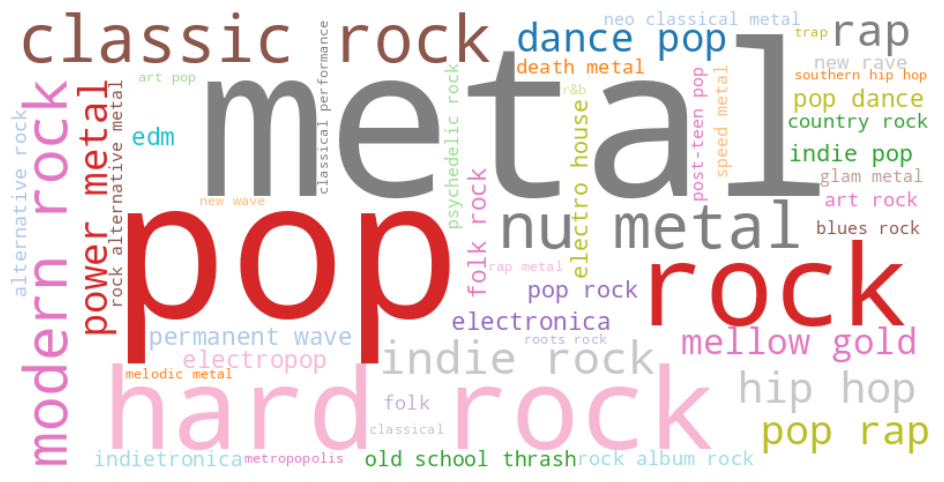

In [ ]:
# Filter out rows with missing genres
union_df.dropna(subset=['genres'], inplace = True)
# Concatenate all the genres into a single string
text = " ".join(genre for genre in union_df.genres)

# Count the frequency of each word in the text
word_counts = {}
for word in text.split(', '):
    word_counts[word] = word_counts.get(word, 0) + 1

# Create a WordCloud object with custom parameters
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white', colormap='tab20').generate_from_frequencies(word_counts)

# Display the word cloud plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()




In [ ]:
# Sort the word_counts dictionary by value
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted list
df = pd.DataFrame(sorted_word_counts, columns=['Genre', 'Frequency'])

# Get the top 10 rows
top_10_genres = df.head(10)
top_genres_list = top_10_genres['Genre'].to_list()

# Show the top 10 genres
top_10_genres

,Genre,Frequency
0,metal,6330
1,pop,5231
2,hard rock,5213
3,rock,5192
4,classic rock,4178
5,nu metal,3869
6,modern rock,3376
7,indie rock,3261
8,rap,3116
9,hip hop,2777


**CHECK CORRELATION**

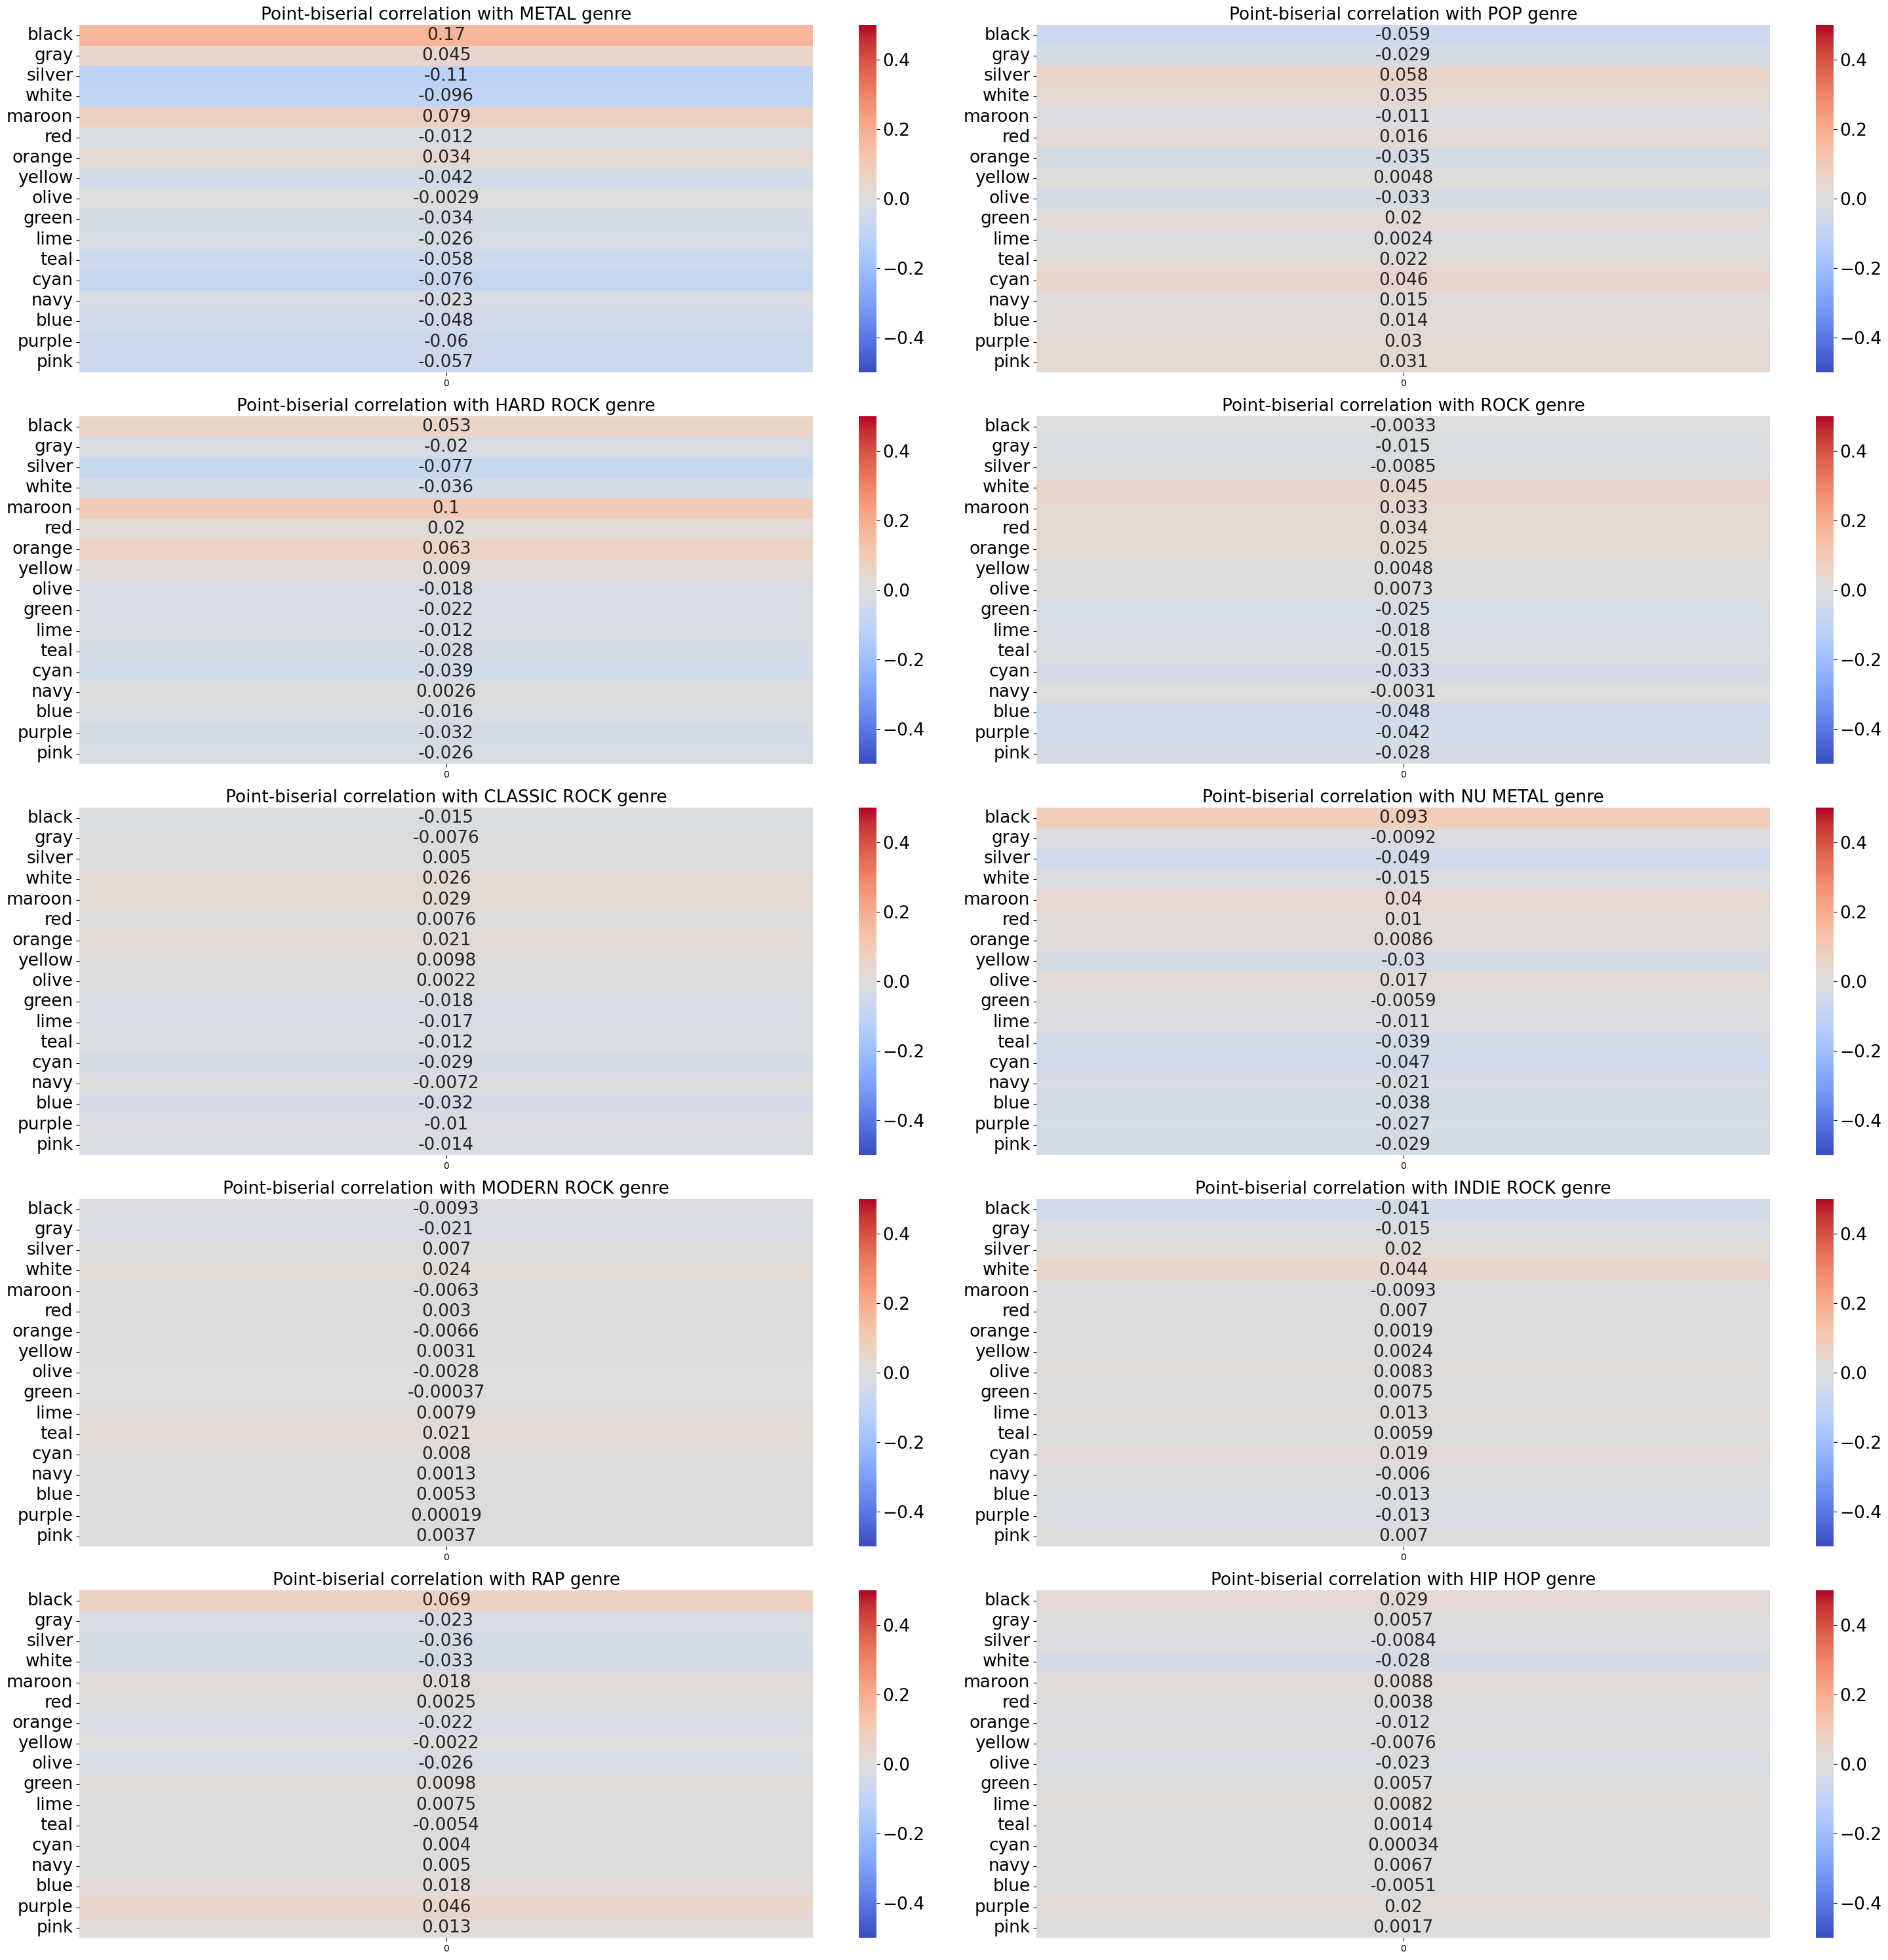

In [ ]:
color_cols = ['black', 'gray', 'silver', 'white', 'maroon', 'red',
              'orange', 'yellow', 'olive', 'green', 'lime', 'teal',
              'cyan', 'navy', 'blue', 'purple', 'pink']

create_corr_plots(union_df, top_genres_list)

In [ ]:
# calculate point biserial correlation
corr, pval = pointbiserialr(union_df['metal'], union_df['black'])

# print correlation and p-value
print('Point biserial correlation:', f'{corr:.4f}')
print('P-value:', f'{pval:.4f}')

Point biserial correlation: 0.1719
P-value: 0.0000


Well, the hypothesis about the presence of a correlation between the genre and the proportion of certain basic colors in the palette of the song cover was not confirmed. Nevertheless, an interesting result was obtained for the "metal" genre: there could be a weak positive correlation between this genre (a dichotomous variable) and the poportion of black color in the palette of the cover of a musical composition (metric variable), P-Value is not greater than 0.05 --> the null hypothesis is rejected (the null hypothesis: There is no difference between the songs in metal genre and in not metal genre with respect to the variable 'black' of proportion of this color in color palette)